In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [153]:
dataset = pd.read_excel('data_1.xlsx', sheet_name='data')

In [154]:
dataset

,BITS ID,Campus,Program Applied to,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Did you choose to work for a few months/years before applying to graduate school?,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Was the above PS2/Thesis experience relevant to your application profile?,Internship other than PS1/PS2,Did you join any other classes/consultancy for your application process ?,Journal / Conference ( if your paper was published )
0,2015A7TS0081P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,7.93,Arizona State University,154,170,4,...,NO,Yes,1.50,NaN,Singapore University of Tech and Design,Reinforcement Learning for path planning. Was ...,NO,Yes,NO,MDPI Applied Sciences
1,2012C6PSC6598P,Pilani,MS,Computer Science,NaN,6.7,Arizona State University,159,167,3.5,...,NO,Yes,1.50,CSIR- National Aerospace Laboratories,PS 2,Worked at Khosla labs,Yes,NO,NO,NO
2,2014A3PS224P,Pilani,MS,Mechanical Engineering,Robotics,7.78,Arizona State University,154,169,3.5,...,NO,NO,0.00,NaN,Infinera,Hardware Testing,NO,NO,NO,NaN
3,2015A3PS0270P,Pilani,MS,Computer Science,NaN,7.98,Arizona State University,148,169,4,...,NO,NO,0.50,NaN,NaN,NaN,Yes,NO,NO,NaN
4,2012B1A4761P,Pilani,PhD,BioEngineering,Tissue Engineering,8.4,Boston University,163,164,5,...,YES,Yes,1.50,NaN,Thesis - Harvard Medical School,"Design and development of cell phone enabled, ...",Yes,Yes,NO,"5 publications - ACS NaNO, Nature Communicatio..."
5,2012B1A4786P,Pilani,MS+PhD,Bioengineering,NaN,7.46,Boston University,155,163,4,...,NO,Yes,2.00,"CHAMBAL FERTILISERS AND CHEMICALS LIMITED, KOTA","Brigham and Women's Hospital, Harvard Medical ...",Developed and fabricated microfluidic models f...,Yes,NOne,NO,2 Indian patent applications in process
6,2011A7TS074P,Pilani,PhD,Computer Science,Artificial Intelligence/ Machine Learning,8.54,Carnegie Mellon,170,169,5,...,YES,NO,0.50,NaN,NaN,NaN,NaN,NaN,Yes,NaN
7,2015A2TS0550H,Hyderabad,MS,Civil Engineering,Transportation Engineering,9.03,Carnegie Mellon University,151,169,2.5,...,YES,NO,0.00,NaN,On campus thesis,NaN,Yes,Yes,Yes,NaN
8,2007B2A4655G,Goa,MS,Other,Public Policy,6.31,Carnegie Mellon University,165,167,4.5,...,YES,Yes,2.00,Mphasis Ltd.\nTook 2 Recommendations from Work...,NaN,NaN,NO,NO,NO,NaN
9,2012A3PS259H,Hyderabad,MS,Mechanical Engineering,Robotics,8.46,Carnegie Mellon University,151,167,3,...,NO,NO,0.00,NaN,"Tonbo Imaging, Bangalore",NaN,Yes,NO,NO,NOne


Shuffling dataframe to not be dependent on time based factors

In [155]:
#dataset.sample(frac=1).reset_index(drop=True, inplace=True)

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 23 columns):
BITS ID                                                                              1432 non-null object
Campus                                                                               1431 non-null object
Program Applied to                                                                   1431 non-null object
Target Discipline                                                                    1381 non-null object
Sub-Discipline                                                                       1004 non-null object
CGPA                                                                                 1431 non-null object
University Selected                                                                  1012 non-null object
GRE Score : Verbal                                                                   1415 non-null object
GRE Score : Quant                            

Renaming few columns 

In [157]:
dataset.columns = (['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)',
       'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program',
       'Internship other than PS1/PS2',
       'Consultancy/Classes',
       'Conference publication'])

In [158]:
dataset.isnull().sum()

BITS ID                                  2
Campus                                   3
Program Applied                          3
Target Discipline                       53
Sub-Discipline                         430
CGPA                                     3
University Selected                    422
GRE Score : Verbal                      19
GRE Score : Quant                       18
GRE Score : AWA                         25
TOEFL Score                             43
Universities Applied                     4
Universities Admit                     320
Universities (Funded admit)            177
Work experience                        245
Duration of work experience            254
Work Experience details                889
PS2/Thesis Organization                351
PS2/Thesis Details                     898
Relevance of PS2/Thesis to program     423
Internship other than PS1/PS2          894
Consultancy/Classes                    565
Conference publication                1227
dtype: int6

In [159]:
dataset[dataset['BITS ID'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
dataset[dataset['CGPA'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1135,Batch 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All values are NANs for missing ID values, implying empty rows 

In [161]:
dataset.dropna(subset=['BITS ID','CGPA'], inplace=True)

Dealt with missing values in crucial field that werent supposed to be missing 

In [391]:
dataset.isnull().mean()*100

BITS ID                                0.000000
Campus                                 0.000000
Program Applied                        0.000000
Target Discipline                      0.000000
Sub-Discipline                        29.782761
CGPA                                   0.000000
University Selected                   29.432376
GRE Score : Verbal                     0.000000
GRE Score : Quant                      0.000000
GRE Score : AWA                        1.541696
TOEFL Score                            2.733006
Universities Applied                   0.070077
Universities Admit                    22.214436
Universities (Funded admit)           12.193413
Work experience                        0.000000
Duration of work experience            0.000000
Work Experience details               61.878066
PS2/Thesis Organization               24.316748
PS2/Thesis Details                    62.508760
Relevance of PS2/Thesis to program     0.000000
Internship other than PS1/PS2         62

Dealing with target discipline column

In [163]:
a = dataset[dataset['Target Discipline'].isnull()]
a

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
117,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,...,NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
505,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,...,NO,NO,0.0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN
1058,2007A7PS044P,Pilani,PhD,NaN,Systems and Networking,9.49,NaN,660,800,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,2008A1PS500G,Goa,MS,NaN,Aerospace Engineering,7.37,Penn State (NO Aid),650,800,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,2006B5A3657,Pilani,MS,NaN,"DSP, Digital Systems Design",8,"Maryland, PennState, TAMU, NCSU",157,164,3,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2006a4ps313p,Pilani,MS,NaN,Industrial engineering,9.53,Tamu-College station(aid NOt yet declared),720,710,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2006c6ps249p,Pilani,MS,NaN,Artificial Intelligence/ Machine Learning,9.26,Stanford\nETH Zurich\nUMass Amherst,730,730,3.5,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,2006A8PS280,Pilani,MS,NaN,Digital IC Design,8.94,"Columbia, TAMU, Virginia Tech, UoMinnesota (al...",660,700,3,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,2007A7PS132,Pilani,PhD,NaN,Theoretical Science,9.35,MPI-SWS (Max Plank INstitute of Software Syste...,600,760,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,2006A3PS172,Pilani,MS,NaN,Analog and Mixed Signal,9.07,Univ of Columbia,690,700,4,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As subdiscipline values are not null for target discipline being null, we dont have to drop these rows. 

In [164]:
dataset['Target Discipline'] = dataset['Target Discipline'].str.strip()
dataset['Target Discipline'].unique()

array(['Computer Science', 'Mechanical Engineering', 'BioEngineering',
       'Bioengineering', 'Civil Engineering', 'Other',
       'Environmental Engineering',
       'Electrical and Electronics Engineering', 'Engineering Management',
       'Chemical Engineering', 'EcoNOmics', 'Physics',
       'Mathematics/Statistics', 'Biological Sciences', 'Finance', nan,
       'Computational Science', 'Business Analytics',
       'Pharmaceutical Sciences', 'Chemistry', 'Zoology', 'Management',
       'computer science', 'Engineering Technology', 'Biology',
       'Aerospace Engineering', 'Biological sciences'], dtype=object)

There are multiple duplicate categories to be dealt with. Eg. 'Computer science', 'computer science' are the same categories.

In [165]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'computer science'].index 
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Computational Science'].index
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological sciences'].index 
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological Sciences'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Zoology'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == ' Bioengineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'BioEngineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'EcoNOmics'].index
dataset.loc[l,'Target Discipline'] = 'Economics'











In [166]:
l = dataset[dataset['Target Discipline'].isnull() & dataset['Sub-Discipline'].isnull()].index
dataset.drop(l, inplace=True)

In [167]:
dataset['Target Discipline'].value_counts()

Computer Science                          511
Electrical and Electronics Engineering    344
Mechanical Engineering                    214
Chemical Engineering                       60
Civil Engineering                          56
Biology                                    25
Bioengineering                             23
Pharmaceutical Sciences                    21
Physics                                    21
Mathematics/Statistics                     20
Other                                      19
Business Analytics                         17
Finance                                    16
Environmental Engineering                  12
Engineering Management                      6
Management                                  5
Economics                                   5
Chemistry                                   2
Aerospace Engineering                       2
Engineering Technology                      2
Name: Target Discipline, dtype: int64

Merging related fields like Economics and Finance, Aerospace and mechanical. This step is performed to create a more balanced dataset

In [168]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'Economics'].index
dataset.loc[l,'Target Discipline'] = 'Finance'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Engineering Management'].index 
dataset.loc[l,'Target Discipline'] = 'Management'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Aerospace Engineering'].index 
dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

Dealing with 'other' category 

In [169]:
dataset[dataset['Target Discipline'] == 'Other']['Sub-Discipline'].value_counts().index

Index(['Media Arts and Sciences', 'UX Research', 'Public Policy',
       'Music techNOlogy', 'Public Policy ', 'Computational Sciences'],
      dtype='object')

Accomodating them in current categories for Target variables if possible to prevent them acting as outliers

In [170]:
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy ')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Computational Sciences')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='UX Research')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Music techNOlogy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline']= 'Electrical and Electronics Engineering'

In [171]:
dataset[dataset.loc[:,'Target Discipline'] == 'Other']['Sub-Discipline']

35                         NaN
86     Media Arts and Sciences
551                        NaN
554                        NaN
555                        NaN
557                        NaN
565                        NaN
571                        NaN
599                        NaN
601                        NaN
602                        NaN
611                        NaN
628                        NaN
755                        NaN
Name: Sub-Discipline, dtype: object

Imputing Nan value in Target disiciple from Sub-Discipline

In [172]:
dataset['Target Discipline'].isnull().sum()

48

In [173]:
dataset[dataset.loc[:,'Target Discipline'].isnull()]['Sub-Discipline'].value_counts().index

Index(['VLSI', 'Construction Engineering and Management',
       'Artificial Intelligence/ Machine Learning', 'Systems and Networking',
       'Materials and minerals; Process simulations',
       'Communications&Signal Processing', 'Information Security',
       'Analog and Mixed Signal ', 'Neuroscience', 'Database Systems',
       'Network Security', 'Cognitive Neuroscience',
       'Land use and transportation planning', 'Digital IC Design',
       'DataScience', 'Storage Area Networks', 'Design', 'mechanical',
       'Networks and Distributed Systems', 'Fracture Mechanics',
       'Information Systems Management', 'Finance',
       'Structural Health Monitoring and Structural Control', 'MIS',
       'DSP, Digital Systems Design', 'Mobile Communications',
       'Reversible logic, quantum computing, Communication Engineering',
       'Aerospace Engineering', 'Sustainable Systems', 'Power Electronics',
       'RF IC', 'DSA and Networks', 'Mechanical-Design and Manufacturing',
       

dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].loc[:,'Target Discipline'] = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].fillna({'Target Discipline' : 'Biology'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].fillna({'Target Discipline' : 'Chemical Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].fillna({'Target Discipline' : 'Environmental Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].fillna({'Target Discipline' : 'Environmental Engineering'})


In [174]:
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna('Civil Engineering', inplace= True)
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]


Removing Garbage values , with Nan in all columns

Defining functions for target disicipline with lots of subdisciplines

In [175]:
def mechanical(subdiscipline):
    l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

In [176]:
def computers(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Computer Science'

In [177]:
def electronics(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Electrical and Electronics Engineering'

In [178]:
def biology(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Biology'

In [179]:
def civil(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Civil Engineering'

Defining lists for different subdisciplines related to a target discipline

In [180]:
lis_mech = ['Automobile ', 'Mechanical-Design and Manufacturing','Fracture Mechanics', 'Aerospace Engineering', 'Sustainable Systems', 'Industrial engineering','Design Engineering','mechanical'  ]
lis_comp= ['MIS','Systems and Networking','Storage Area Networks','Management Information Systems', 'DataScience','Artificial Intelligence/ Machine Learning','Distributed Systems','Networks and Distributed Systems','Information Systems Management','DSA and Networks','Network Security','Database Systems','Information Security']
lis_elec = ['Audio Engineering/Music TechNOlogy','RF IC','Analog and Mixed Signal ','Analog and Mixed Signal','VLSI','Mobile Communications','Communications&Signal Processing','Analog and Mixed Signal','DSP, Digital Systems Design','Power Electronics', 'Digital IC Design','Reversible logic, quantum computing, Communication Engineering','Design']
lis_bio = ['Developmental Biology','Neuroscience','Cognitive Neuroscience','Structural Health Monitoring and Structural Co...']
lis_civil = ['Construction Engineering and Management','Land use and transportation planning']

In [181]:
for i in lis_mech: 
    mechanical(i)
for i in lis_comp:
    computers(i)
for i in lis_elec:
    electronics(i)
for i in lis_bio:
    biology(i)
for i in lis_civil:
    civil(i)

In [182]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].index
dataset.at[l,'Target Discipline'] = 'Environmental Engineering'


In [183]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Theoretical Science')].index
dataset.at[l,'Target Discipline'] = 'Physics'

In [184]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].index
dataset.at[l,'Target Discipline'] = 'Finance'

In [185]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].index
dataset.at[l,'Target Discipline'] = 'Chemical Engineering'

In [186]:
l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Management Science and Engineering')].index
dataset.at[l,'Target Discipline'] = 'Management'

In [187]:
dataset[dataset['Target Discipline'].isna()]['Sub-Discipline']

1084    Structural Health Monitoring and Structural Co...
Name: Sub-Discipline, dtype: object

In [188]:
dataset.loc[1084,'Target Discipline'] = 'Biology'

Dealing with other categorical columns

"Work Experience"

In [189]:
dataset['Work experience'].unique()

array(['Yes', 'NO', nan, 'yes', 'no'], dtype=object)

In [190]:
l = dataset[dataset.loc[:,'Work experience']== 'yes'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'Yes'
l = dataset[dataset.loc[:,'Work experience']== 'no'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'NO'

Imputing missing values in this column as No

In [191]:
dataset['Work experience'].fillna('NO', inplace= True)    

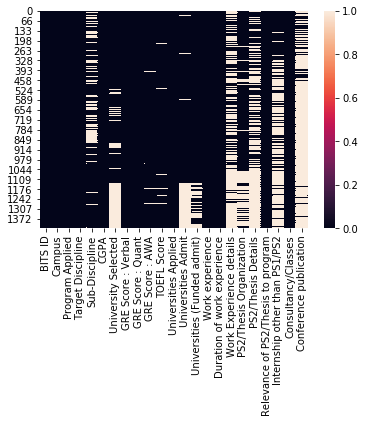

In [390]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(dataset.isnull())

In [ ]:
dataset.drop(31, inplace= True)                            #dealing with random string values in CGPA column

In [240]:
dataset[dataset['CGPA'] > 9].loc[:,'GRE Score : Quant'].unique() 

array([169, 167, 170, 168, 166, 165, 163, nan, 162, 155, 160, 164, 154,
       111, 157, 156, 161, 340, 300, 148, 151, 158, 144, 150, 145, 149],
      dtype=object)

In [218]:
#dealing with random string values in GRE column
l = dataset[dataset['GRE Score : Verbal'] == 'NA (GRE NOt required for the application)'].index
dataset.drop(l,inplace= True)
dataset.loc[957, 'GRE Score : Verbal'] = 150

In [260]:
l = dataset[dataset['GRE Score : Verbal'] == 0].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Verbal'] == 'no'].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 'no'].index
dataset.at[l,'GRE Score : Quant'] = np.nan

As visible the data consists of scores both in range 0-340(new format) and 0-1400(old) format. Therefore suitable conversion of the old scores to new scale is required

#### Defining dictionary for conversion based on conversion tables available online

In [239]:
#Quant conversion 
quant_dict = dict({800:166,790:164,780:163,770:161,760:160,750:159,740:158,730:157,720:156,710:155,700:155,690:154,680:153,670:152,660:152,650:151,640:151,630:150,620:149,610:149,600:148,590:148,580:147,570:147,560:146,550:146,540:145,530:145,520:144,510:144,500:144,490:143,480:143,470:142})
dataset.replace({"GRE Score : Quant": quant_dict}, inplace= True)
dataset['GRE Score : Quant'].unique()

In [256]:
# Verbal conversion 
verb_dict = dict({800:170,790:170,780:170,770:170,760:170,750:169,740:169,730:168,720:168,710:167,700:166,690:165,680:165,670:164,660:164,650:163,640:162,630:162,620:161,610:160,600:160,590:159,580:158,570:158,560:157,550:156,540:156,530:155,520:154,510:154,500:153,490:152})
dataset.replace({"GRE Score : Verbal": verb_dict}, inplace= True)
dataset['GRE Score : Verbal'].unique()

array([154., 159., 148., 163., 155., 170., 151., 165., 157., 161., 158.,
       150., 167., 160., 156., 168., 149., 153., 166., 164., 162., 152.,
       140., 147., 143., 145., 144., 146.,  nan,  38., 169., 430., 111.,
       171., 331., 400., 321., 322., 420., 460., 311., 314., 323., 332.,
       313., 320., 315., 328., 309., 745., 326., 327., 319., 304., 318.])

Imputing values for GRE score based on mean of GRE scores of other candidates with similar cgpa 

In [270]:
dataset['CGPA'] = pd.to_numeric(dataset['CGPA'])
dataset['GRE Score : Quant'] = pd.to_numeric(dataset['GRE Score : Quant'])
cg9_verbal = dataset[dataset['CGPA'] >= 9].loc[:,'GRE Score : Verbal'].mean()
cg9_quant = dataset[dataset['CGPA'] >=9].loc[:,'GRE Score : Quant'].mean()
cg8_verbal = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Verbal'].mean()
cg8_quant = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Quant'].mean()
cg7_verbal = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Verbal'].mean()
cg7_quant = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Quant'].mean()
cg6_verbal = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Verbal'].mean()
cg6_quant = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Quant'].mean()
cg5_verbal = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Verbal'].mean()
cg5_quant = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Quant'].mean()

Setting values for quant

In [345]:
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Quant'] = cg9_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg8_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg7_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg6_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Quant'] = cg5_quant

Setting values for verbal

In [348]:
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Verbal'] = cg9_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg8_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg7_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg6_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg5_verbal

Dealing with campus category

In [362]:
dataset['Campus'] =  dataset['Campus'].str.lower()
dataset['Campus'] = dataset['Campus'].str.strip()
dataset['Campus'].unique()

array(['pilani', 'hyderabad', 'goa', 'dubai'], dtype=object)

Dealing with Program applied category 

In [366]:
dataset['Program Applied'] = dataset['Program Applied'].str.replace(" ", "")
dataset['Program Applied'].unique()

array(['MS', 'PhD', 'MS+PhD'], dtype=object)

In [365]:
# Merging MEM and MEngg to MS
l = dataset[dataset['Program Applied'] == 'M.Engg'].index
dataset.loc[l,'Program Applied'] = 'MS'
l = dataset[dataset['Program Applied'] == 'MEM'].index
dataset.loc[l,'Program Applied'] = 'MS'

Dealing with consultancy category 

In [372]:
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes'], dtype=object)

In [373]:
dataset['Consultancy/Classes'].fillna('NO', inplace= True)
l = dataset[dataset['Consultancy/Classes'] != 'NO'].index
dataset.loc[l,'Consultancy/Classes'] = 'Yes'
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with Relevance to PS2

In [380]:
dataset['Relevance of PS2/Thesis to program'].fillna('NO', inplace= True)
dataset['Relevance of PS2/Thesis to program'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with duration work experience

In [389]:
dataset[dataset['Duration of work experience'].isnull()]
# All null values have NO in the Work experience columns

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


In [388]:
# Imputing zeros to nan 
dataset['Duration of work experience'].fillna(0, inplace= True)

Dealing with TOEFL scores 

In [405]:
dataset['TOEFL Score'].unique()

array([105, 110, 103, 118, 116, 120, 114, 102, 107, 108, 112, 111, 115,
       119, nan, 117, 113, 106, 109, 99, 98, 96, 100, 104, 94, 97, 92,
       101, 95, 1.6, 85, 88, 93, 89, 86, 90], dtype=object)

In [404]:
# imputing Nan for non numeric 
l = dataset[(dataset['TOEFL Score'] == 'IELTS band 8.0') | (dataset['TOEFL Score'] == 'Na') | (dataset['TOEFL Score'] == 'IELTS-7.5')| (dataset['TOEFL Score'] == 1460) | (dataset['TOEFL Score'] == 'na')| (dataset['TOEFL Score'] == 0) | (dataset['TOEFL Score'] == 280)].index
dataset.loc[l,'TOEFL Score'] = np.nan
l = dataset[(dataset['TOEFL Score'] == '108/120')].index
dataset.loc[l,'TOEFL Score'] = 108

Dealing with Target Values

In [356]:
dataset['University Selected'] = dataset['University Selected'].str.lower()


In [56]:
dataset['University Selected'].str.lower().value_counts() #lowercasing

carnegie mellon university                                                                                                                                                                                                                                                                                              46
georgia tech                                                                                                                                                                                                                                                                                                            45
ucsd                                                                                                                                                                                                                                                                                                                    30
texas a&m university                                   

In [57]:
dataset['University Selected'] = dataset['University Selected'].str.strip() #removing spaces from start and front

In [58]:
pd.set_option('display.max_rows', None)
dataset['University Selected'].value_counts()
    

carnegie mellon university                                                                                                                                                                                                                                                                                              46
georgia tech                                                                                                                                                                                                                                                                                                            45
ucsd                                                                                                                                                                                                                                                                                                                    30
texas a&m university                                   